# Stock market Indicator Using Klangoo API

The stock prices are directly related to people opinion and trust. Financial markets are based on `expectations` , and investors buy or sell shares depending on the `sentiments of fear or desire` caused by some event . Investors bet on the credibility of the media outlets that publish rumours despite knowing that the information is not always reliable. `Sentiment Analysis` can be used to determine the `overall opinion` for a certain stock. 

 A fast answer to our research can be to apply `sentiment analysis` on every text containing the word(s) we are interested  in.

But, It is not accurate to study every text containing the keyword we are looking for, but how de we know if the `domain` of the text is  the same domain we we are interested  in (Buisness, Technology, ...) or the text is about a completely different domain and citing this word as an example while speaking about another thing??  

How do we know if a certain text is directly related to the stock we are interested  in (i.e.: the stock is the main subject or one of the main subjects of the text) and not cited as a secondary subject in the text?

### KLANGOO can be the answer

`Klangoo` can be used to determine, for each text (a newspaper article) if the domain and the main subject of the text (entities) are what we are interested  in. 

An API was used to collect articles from different sources, for a certain key word, in a ceratain period of time. The results are sent one by one to `Klangoo` to speicify, for each text, the main categories and entities and keyTopics.
 
After sending the tweet as a requeest to `Klangoo`, we process the results: if the main `category`, the main `entities`, and the `keyTopics` of the text  are related to our goal: the text will be processed: `NLTK` library will give us the sentiment score for this text. Otherwise it will be neglected.

After processing all the texts, giving a normal coefficiant to a normal text, and a high coefficnant to a text having a ` highly trusted source`, a final sentiment analysis score will be given to the initial word or bag of words. 

If it is `negative`, this could be an indicator that the  stock isgoing `down` (this is just a definitive  decision, the sotck market is very complicated and many other causes can play a role), and vice versa.

The result will be a final score of sentiment analysis of the main topic (Bitcoin in our example)and a simple advice.



### Define a function that will be used in the code

In [22]:
def have_common(x,y):
   common = False
   for value in x:
      if value in y:
         common= True
   return common

### Importing Libraries 

In [23]:
pip install klangooclient

Note: you may need to restart the kernel to use updated packages.


In [24]:
from klangooclient.MagnetAPIClient import MagnetAPIClient
import pandas as pd
import json
import string

### Prepare connection strings and secret key for Klangoo

In [25]:
#prepare the connection strings and the secret key to connect to Klangoo
ENDPOINT ='https://nlp.klangoo.com/Service.svc'
CALK = '155b99fc-758c-40c8-a8ef-5d4eb9fba616'
SECRET_KEY = 'wTMeUVHL38vGrdDBbSdSFBQOWFchPTaUnIFZBJS4'

client = MagnetAPIClient(ENDPOINT, CALK, SECRET_KEY)

## "Bitcoin stock" Indicator today (July 19 -  2022)

### Install newsdataapi 

In [12]:
pip install newsdataapi

#### The `newsdataapi`   is used  to provide articles from different sources (Better than searching in hundreds of websites) containig a specific word ), in over 80,000 websites.

### Make a request to `newsapi` to get the atricles.

In [26]:
import requests
from newsdataapi import NewsDataApiClient

In [27]:
api = NewsDataApiClient(apikey='pub_9173b9c5020815c947c4ebd4e19094a1b11d')
#https://newsdata.io/

#the result is stored in response variable (a dictionary)
response = api.news_api( q= "bitcoin OR Bitcoin OR bitcoins OR Bitcoins", language='en')
print("Done")

Done


### Now we have the articles related to bitcoin in the specific range in `response` dictionary.

In [28]:
#The elements of the 9th response
print(response['results'][8].keys())

dict_keys(['title', 'link', 'keywords', 'creator', 'video_url', 'description', 'content', 'pubDate', 'image_url', 'source_id', 'country', 'category', 'language'])


In [29]:
print(response['results'][9]['creator'])

['Juhi Mirza']


In [30]:
#First 300 chars of the content
print(response['results'][5]['content'])

None


### In this cell, we specified the wanted stock, the top influencers, the Trusted resources, the wanted enities , categories and topics.

In [31]:
#determine the wanted entity and categories
wanted_stock = "Bitcoin stock BTC" #Only for the final text print

# The top influencers in stock market prediction
Top_influencers = ['elon musk', 'nick black', 'allan mantaring', 'jordan belfort', 'tangie seals', \
                   'rowan mcinnesmark minervini', 'vic scherersteve sturner', 'brittney castro', 'garrett ashe', \
                   'raja al mazrouei', 'chamath palihapitiya', 'cathie wood', 'dave portnoy', 'oliver l. velez', \
                   'john bollinger', 'robert ross', 'kayla kilbride', 'errol coleman', 'timothy sykes', 'kritika yadav',\
                   'trajan king', 'denis stelmak', 'patrick wieland']

#The most trusted newspapers in the domain of stock exchange
Trusted_resources =['moneycontrol', 'the economic times', 'bloomberg quint', 'reuterslivemint', '\
buisness standard', 'google finance', 'ndtv profit', 'yahoo finance', 'reuters']

wanted_entities = ['bitcoin', 'btc'] #Stock(s) interested  in, This option is subjective to the user.
wanted_topics = ['bitcoin', 'btc']
wanted_categories = ['general','business', 'politics','technology']#Only these categoreis will be taken into considertion


### Code

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

nb = len(response['results'])
temp_nb = 2 #For testing only
ctr = 0
grade_sum = 0
final_grade = 0

for i in range(nb ):
    #Since the API give only 200 chars in contnet, this is not acceptable
    # a good idea would be to use the title and the description as a subsitute since they contion most of the meaning.
    
    text = response['results'][i]['content']
    creator = response['results'][i]['creator'] #get the creator of text from the API response
    
    if text is not None:
        request =  { 'text' : text, 'lang' : 'en', 'format' : 'json' }
        rsp = client.callwebmethod('ProcessDocument', request, 'POST')#Use Klangoo to get all entities and categories of text
        info = json.loads(rsp) #transform from Bytes to Json format
        info.fromkeys

        #print("Request nb:",i,"is successful.")
        #print("Text nb:", i, "is: ", text[:200])#print first 200 chars of the text

        entities_nb = len(info['document']['entities'])
        keyTopics_nb = len(info['document']['keyTopics'])
        categories_nb = len(info['document']['categories']) 
        
        text_entities = []   # get the key topics from text and append to this list
        key_topics = []
        text_categories = []   # get the categories from text and append to this list 
       
        
        for j in range(entities_nb):#adding entites from klangoo response to  text_entities list
            if info['document']['entities'][j]['score'] > 0.7: #only add the entities with high score (not all of them), if high score the entity is directly related to main subject
                text_entities.append(info['document']['entities'][j]['token'].lower() ) 
                
        for j in range(keyTopics_nb):#adding keyTopics from Klangoo to keyTopics
            if info['document']['keyTopics'][j]['score'] > 0.5: #key topics contains many topics, but the high rated are directly related
                key_topics.append( info['document']['keyTopics'][j]['text'].lower())
                
        for j in range(categories_nb):#adding categoreis from klangoo response to  text_categories
            text_categories.append(info['document']['categories'][j]['name'].lower() ) # append the key categories to the list

        #print("Entities for Text nb:", i, "are: ", text_entities)
        #print("keyTopics for text nb: ", i, "are", key_topics,"\n")
        #print("Categories for Text nb:", i, "are: ", text_categories, "\n")
        
        #check existecne of an item of text_categories in wanted_category 
        check_category = have_common(wanted_categories, text_categories ) 
        check_topics = have_common(wanted_topics, key_topics)
        check_entities = have_common(wanted_entities, text_entities )
                
        #If the article category and entity are the wanted ones, we apply S.A.
        if check_category  and  (check_entities or check_topics): 
            ctr += 1
            score = analyser.polarity_scores(text)
            print("Text: ", i, "have the wanted entities/topics and category.")
            print("text_categories:", text_categories)
            print("key_topics:", key_topics)
            print("text_entities:", text_entities)
            print("Sentiment analysis for text: ",  i , "is: ", score, "\n\n")
            #check if the text is from a top influencer or a top trusted source, if so consider as 10 texts
            if (creator in Top_influencers) or (creator in  Trusted_resources):
                ctr += 10
                grade_sum += score['compound'] * 10
            #compound(result from NLTK library) element of the polarity score determine if positive >0.5 or negative <-0.5
            else:
                grade_sum += score['compound'] 
        #print("check_category condition: ", check_category )
        #print("check_entities condition: ", check_entities)
        #print("check_topics condition: ", check_topics)
        #print()
        #print("-----------------")
        #print()
        
print("Final Result:  \n\n")     
if ctr > 0:
    final_grade = grade_sum / ctr

    if final_grade < -0.1: #check the condition neg or pos and total score in NLTK
        print("The " , wanted_stock  ,"have negative Semantic Analysis in the given articles,it could be an indicator that this stock does not have community trust in the determined time.\
         articles, the term bitcoin or BTC got a polarity scrore of : " , final_grade, " on 1 .")
    elif final_grade > 0.1:
        print("The ",wanted_stock, "  have a positive Semantic Analysis in the given articles,it could be an indicator \
        that this stock have community trust in the determined time.\
         the term bitcoin or BTC got a polarity scrore of :" , final_grade, " on 1 .")
    else:
        print("After analysing the relative articles, the ", wanted_stock, " have a neutral Semantic Analysis.")          
    

    


### The result of the Bitcoin sentiment analysis  today gives us a positive indicator about "bitcon-USD" stock.

### Surprising? It could be suprising knowing the current fall of the bitcoin price, but if we look at the chart  as in the graph below  the price in this week had a suprising rise.

https://coinmarketcap.com/currencies/bitcoin/
 

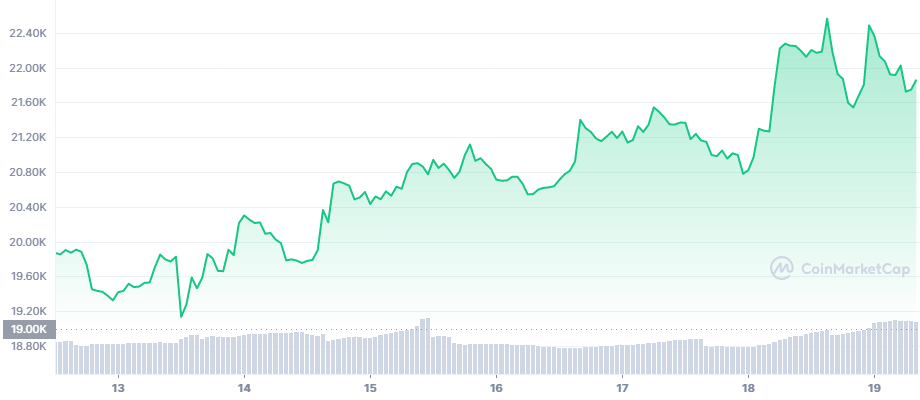

### Finally, It is not a definitive way to prove the stock market orientation, but it could be a good indicator.

.

### Improved version

#### Accroding to this article https://link.springer.com/article/10.1007/s12559-021-09819-8 in `Springer` the most accurate lexicon library for analyzing tweets for stock market prediction is `senticnet`, a library made by the MIT Media Laboratory in 2010.


 